In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
class_df = pd.read_csv("../sheener/SYDE 1A Class Profile Questions.csv")
class_df.head(10)

In [3]:
filter_difficulty = [col for col in class_df.columns if col.startswith("How difficult")]
print(filter_difficulty)

['How difficult did you find each 1A course to be? [101L]', 'How difficult did you find each 1A course to be? [101]', 'How difficult did you find each 1A course to be? [111]', 'How difficult did you find each 1A course to be? [113]', 'How difficult did you find each 1A course to be? [121]', 'How difficult did you find each 1A course to be? [161]', 'How difficult did you find each 1A course to be? [181]']


In [4]:
filter_usefulness = [col for col in class_df.columns if col.startswith("How useful did")]
print(filter_usefulness)

['How useful did you find each of the 1A courses to be? [101L]', 'How useful did you find each of the 1A courses to be? [101]', 'How useful did you find each of the 1A courses to be? [111]', 'How useful did you find each of the 1A courses to be? [113]', 'How useful did you find each of the 1A courses to be? [121]', 'How useful did you find each of the 1A courses to be? [161]', 'How useful did you find each of the 1A courses to be? [181]']


In [ ]:
filter_all = filter_difficulty + filter_usefulness
useful_difficult_df = class_df[filter_all]
print(useful_difficult_df)

In [ ]:
nums_df = useful_difficult_df.replace({"Easy": -2, "Very Useful": 2, "Somewhat Easy": -1, "Somewhat Useful": 1, 
                                       "Neutral": 0, "Somewhat Difficult": 1, "Somewhat Useless": -1, 
                                       "Useless": -2, "Very Difficult": 2}).dropna()
nums_df.head(100)

In [7]:
averaged_nums = nums_df.apply(lambda col: col.mean(), axis="rows")
print(averaged_nums)

How difficult did you find each 1A course to be? [101L]        -0.344086
How difficult did you find each 1A course to be? [101]         -1.569892
How difficult did you find each 1A course to be? [111]          1.107527
How difficult did you find each 1A course to be? [113]          0.698925
How difficult did you find each 1A course to be? [121]         -0.193548
How difficult did you find each 1A course to be? [161]         -0.193548
How difficult did you find each 1A course to be? [181]         -0.064516
How useful did you find each of the 1A courses to be? [101L]    1.010753
How useful did you find each of the 1A courses to be? [101]    -0.795699
How useful did you find each of the 1A courses to be? [111]     1.225806
How useful did you find each of the 1A courses to be? [113]     0.709677
How useful did you find each of the 1A courses to be? [121]     1.806452
How useful did you find each of the 1A courses to be? [161]     0.612903
How useful did you find each of the 1A courses to b

In [8]:
difficulty = averaged_nums[filter_difficulty]
usefulness = averaged_nums[filter_usefulness]
# index both series so that they use course codes as indicies
index_vals = ["101L", "101", "111", "113", "121", "161", "181"]
difficulty.index = index_vals
usefulness.index = index_vals

print(difficulty, usefulness)

101L   -0.344086
101    -1.569892
111     1.107527
113     0.698925
121    -0.193548
161    -0.193548
181    -0.064516
dtype: float64 101L    1.010753
101    -0.795699
111     1.225806
113     0.709677
121     1.806452
161     0.612903
181     0.634409
dtype: float64


In [9]:
averaged_nums_df = pd.concat([difficulty, usefulness], axis="columns")
# change the column names
new_cols = ["difficulty", "usefulness"]
averaged_nums_df.columns = new_cols

averaged_nums_df.head(7)

,difficulty,usefulness
101L,-0.344086,1.010753
101,-1.569892,-0.795699
111,1.107527,1.225806
113,0.698925,0.709677
121,-0.193548,1.806452
161,-0.193548,0.612903
181,-0.064516,0.634409


<ipython-input-10-be0bb5943879>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels_1)
<ipython-input-10-be0bb5943879>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels)


[Text(0, -2.0, 'Easy'),
 Text(0, -1.5, ''),
 Text(0, -1.0, 'Somewhat Easy'),
 Text(0, -0.5, ''),
 Text(0, 0.0, 'Neutral'),
 Text(0, 0.5, ''),
 Text(0, 1.0, 'Somewhat Difficult'),
 Text(0, 1.5, ''),
 Text(0, 2.0, 'Very Difficult')]

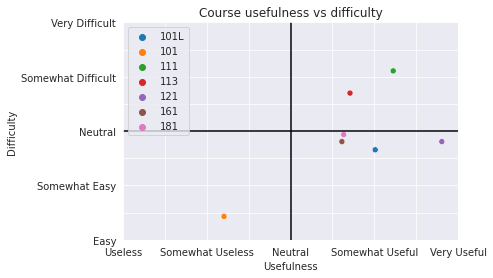

In [10]:
# change background style
sns.set_style("darkgrid")

# plot data
ax = sns.scatterplot(data=averaged_nums_df, x="usefulness", y="difficulty", hue=averaged_nums_df.index)
ax.set_title("Course usefulness vs difficulty")
ax.set_xlabel("Usefulness")
ax.set_ylabel("Difficulty")

# change the limits of the plot
ax.set(xlim=(-2, 2), ylim=(-2,2))

# show x and y axes
ax.axvline(color="black")
ax.axhline(color="black")

# change tick labels
x_labels_1 = ["Useless", "", "Somewhat Useless", "", "Neutral", "", "Somewhat Useful", "", "Very Useful"]
y_labels = ["Very Difficult", "", "Somewhat Difficult", "", "Neutral", "", "Somewhat Easy", "", "Easy"][::-1]
ax.set_xticklabels(x_labels_1)
ax.set_yticklabels(y_labels)

# label each point
# for line in range(0,averaged_nums_df.shape[0]):
#      ax.text(averaged_nums_df.usefulness[line], averaged_nums_df.difficulty[line], averaged_nums_df.index[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

In [11]:
averaged_nums_df = averaged_nums_df.reset_index()
averaged_nums_df

,index,difficulty,usefulness
0,101L,-0.344086,1.010753
1,101,-1.569892,-0.795699
2,111,1.107527,1.225806
3,113,0.698925,0.709677
4,121,-0.193548,1.806452
5,161,-0.193548,0.612903
6,181,-0.064516,0.634409


<ipython-input-14-230bf6eef286>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels)
<ipython-input-14-230bf6eef286>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels)


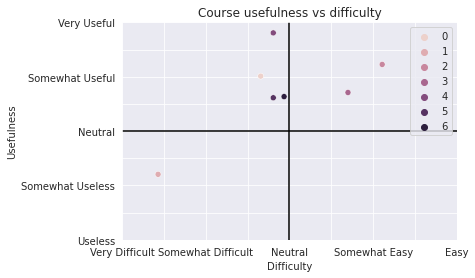

In [14]:
# change background style
sns.set_style("darkgrid")

# plot data
ax = sns.scatterplot(data=averaged_nums_df, x="difficulty", y="usefulness", hue=averaged_nums_df.index)
ax.set_title("Course usefulness vs difficulty")
ax.set_xlabel("Difficulty")
ax.set_ylabel("Usefulness")

# change the limits of the plot
ax.set(xlim=(-2, 2), ylim=(-2,2))

# show x and y axes
ax.axvline(color="black")
ax.axhline(color="black")

# change tick labels
y_labels = ["Useless", "", "Somewhat Useless", "", "Neutral", "", "Somewhat Useful", "", "Very Useful"]
x_labels = ["Very Difficult", "", "Somewhat Difficult", "", "Neutral", "", "Somewhat Easy", "", "Easy"]
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)
ax.figure.savefig('graphs/usefulness_v_difficulty.png')